In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [6]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [7]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [9]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    boot_sample = df.sample(df.shape[0], replace = True)
    control_mean = boot_sample.query('group == "control"').total_days.mean()
    experiment_mean = boot_sample.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [10]:
# convert to numpy array
diffs = np.array(diffs)

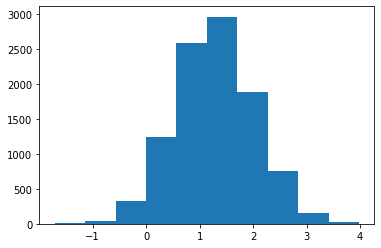

In [13]:
# plot sampling distribution
plt.hist(diffs);

In [12]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

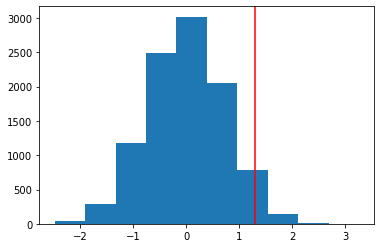

In [14]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, color = 'red');

In [15]:
# compute p value
(null_vals > obs_diff).mean()

0.0384

**With a type I error rate of 0.05, we have evidence that users spend more time in the classroom after seeing the experimental description in the course overview page**

**Is this difference practically significant?**

**No**

**Even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective for Audacity.**
